In [1]:
import requests
import tweepy
from keys import *
from textblob import TextBlob
import pandas as pd

client = tweepy.Client(bearer_token, api_key, api_secret_key, access_token, access_token_secret, 
                       return_type = requests.Response, wait_on_rate_limit=True)
auth = tweepy.OAuth2BearerHandler(bearer_token)
api = tweepy.API(auth)

In [2]:
id = '59553554' #wendy's user id

tweets = client.get_users_tweets(id=id,exclude=['retweets', 'replies'], max_results=50)

In [3]:
# Save data as dictionary
tweets_dict = tweets.json() 
tweets_dict

tweets_data = tweets_dict['data'] 

df = pd.json_normalize(tweets_data) 

df.rename(columns = {'id' : 'Tweet_ID', 'text' : 'Text'}, inplace = True)
df.head(50)

,Tweet_ID,Text
0,1518681018466721792,.@elonmusk let me tweet from space pls
1,1517169828590764036,You ever finish your burg but then you miss it...
2,1514667895497887748,Dropped a Spicy Nugget under the front seat on...
3,1513983410930335753,"Well, no one else was using the drive thru. 🤷‍..."
4,1511766482291765248,When they say “let’s split some nuggs” but the...
5,1511410018083647489,That tomatonator is sounding good for lunch ht...
6,1511377350830788610,When you're eating a Baconator and Shania come...
7,1511054225303814146,What if we kissed on the roof of the VR Wendy’...
8,1510643384419037186,STIUCSIB KCAB ERA STIUCSIB KCUB
9,1510299551063760899,Metaverse this. Metaverse that. Welcome to the...


In [4]:
df['Polarity'] = df['Text'].apply(lambda x: float(TextBlob(x).sentiment.polarity))
df.loc[:,'Classification'] = 'neutral'
df.loc[df['Polarity'] > 0.03, 'Classification'] = 'positive'
df.loc[df['Polarity'] < -0.03, 'Classification'] = 'negative'
df.head(50)

,Tweet_ID,Text,Polarity,Classification
0,1518681018466721792,.@elonmusk let me tweet from space pls,0.000000,neutral
1,1517169828590764036,You ever finish your burg but then you miss it...,0.200000,positive
2,1514667895497887748,Dropped a Spicy Nugget under the front seat on...,-0.051852,negative
3,1513983410930335753,"Well, no one else was using the drive thru. 🤷‍...",0.000000,neutral
4,1511766482291765248,When they say “let’s split some nuggs” but the...,0.093750,positive
5,1511410018083647489,That tomatonator is sounding good for lunch ht...,0.700000,positive
6,1511377350830788610,When you're eating a Baconator and Shania come...,0.000000,neutral
7,1511054225303814146,What if we kissed on the roof of the VR Wendy’...,0.000000,neutral
8,1510643384419037186,STIUCSIB KCAB ERA STIUCSIB KCUB,0.000000,neutral
9,1510299551063760899,Metaverse this. Metaverse that. Welcome to the...,0.800000,positive


In [5]:
x = 0
for value in df['Tweet_ID']:
    df.loc[x, '#_of_Likes'] = api.get_status(int(value)).favorite_count
    df.loc[x, '#_of_Retweets'] = api.get_status(int(value)).retweet_count
    x += 1
df.head(50)

,Tweet_ID,Text,Polarity,Classification,#_of_Likes,#_of_Retweets
0,1518681018466721792,.@elonmusk let me tweet from space pls,0.000000,neutral,75302.0,4117.0
1,1517169828590764036,You ever finish your burg but then you miss it...,0.200000,positive,5648.0,278.0
2,1514667895497887748,Dropped a Spicy Nugget under the front seat on...,-0.051852,negative,1475.0,73.0
3,1513983410930335753,"Well, no one else was using the drive thru. 🤷‍...",0.000000,neutral,6675.0,401.0
4,1511766482291765248,When they say “let’s split some nuggs” but the...,0.093750,positive,2452.0,91.0
5,1511410018083647489,That tomatonator is sounding good for lunch ht...,0.700000,positive,3989.0,133.0
6,1511377350830788610,When you're eating a Baconator and Shania come...,0.000000,neutral,1874.0,107.0
7,1511054225303814146,What if we kissed on the roof of the VR Wendy’...,0.000000,neutral,4295.0,346.0
8,1510643384419037186,STIUCSIB KCAB ERA STIUCSIB KCUB,0.000000,neutral,1731.0,75.0
9,1510299551063760899,Metaverse this. Metaverse that. Welcome to the...,0.800000,positive,11068.0,672.0


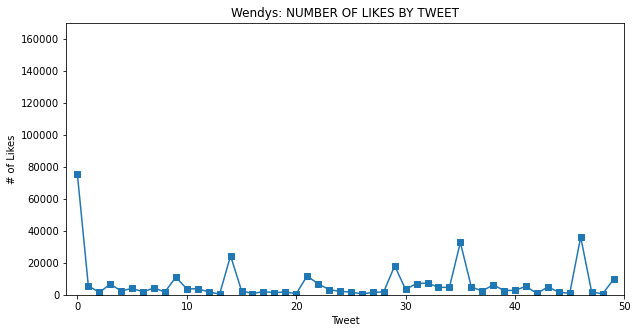

In [6]:
l = df['#_of_Likes']
l.plot.line(title = 'Wendys: NUMBER OF LIKES BY TWEET', ylim=[0, 170000],xlim=[-1,50], legend=False, figsize=[10,5], style='s-', xlabel='Tweet', ylabel='# of Likes');

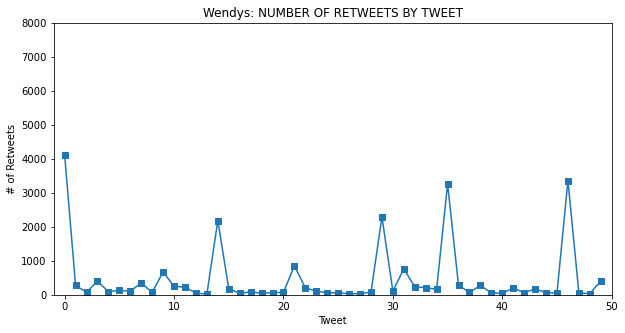

In [7]:
r = df["#_of_Retweets"]
r.plot.line(title = 'Wendys: NUMBER OF RETWEETS BY TWEET', ylim=[0, 8000], xlim=[-1,50], legend=False, figsize=[10,5], style='s-', xlabel='Tweet', ylabel='# of Retweets');

### Some information for presentation

In [8]:
avg_likes = sum(df["#_of_Likes"])/len((df["#_of_Likes"]))
print(f"From the past 50 tweets, Wendys has averaged {avg_likes} likes")
print(f"It's most liked tweet had: {max(df['#_of_Likes'])} likes")
print(f"In the past 50 tweets, Wendys has accumulated: {sum(df['#_of_Likes'])} likes")

From the past 50 tweets, Wednys has averaged 6922.34 likes
It's most liked tweet had: 75302.0 likes
In the past 50 tweets, Wendys has accumulated: 346117.0 likes


In [10]:
avg_retweet = sum(df["#_of_Retweets"])/len((df["#_of_Retweets"]))
print(f"From the past 50 tweets, Wendys has averaged {avg_retweet} retweets")
print(f"It's most liked tweet had: {max(df['#_of_Retweets'])} retweets")
print(f"In the past 50 tweets, Wendys has accumulated: {sum(df['#_of_Retweets'])} retweets")

From the past 50 tweets, Wendys has averaged 462.14 retweets
It's most liked tweet had: 4117.0 retweets
In the past 50 tweets, Wendys has accumulated: 23107.0 retweets
